In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import f1_score

In [54]:
df = pd.read_csv('D:\\Programming\\AI\\Jadi\\Practice\\kNN_Classification\\adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [55]:
df['workclass'] = pd.factorize(df['workclass'])[0]
df['marital-status'] = pd.factorize(df['marital-status'])[0]
df['occupation'] = pd.factorize(df['occupation'])[0]
df['relationship'] = pd.factorize(df['relationship'])[0]
df['race'] = pd.factorize(df['race'])[0]
df['gender'] = pd.factorize(df['gender'])[0]
df['native-country'] = pd.factorize(df['native-country'])[0]
df['income'] = pd.factorize(df['income'])[0]
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,0,226802,11th,7,0,0,0,0,0,0,0,40,0,0
1,38,0,89814,HS-grad,9,1,1,1,1,0,0,0,50,0,0
2,28,1,336951,Assoc-acdm,12,1,2,1,1,0,0,0,40,0,1
3,44,0,160323,Some-college,10,1,0,1,0,0,7688,0,40,0,1
4,18,2,103497,Some-college,10,0,3,0,1,1,0,0,30,0,0


In [56]:
X = df[['age', 'workclass', 'fnlwgt', 'educational-num', 'marital-status', 'occupation',
        'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']]
y = df['income']

In [57]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [58]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (39073, 13) (39073,)
Test set: (9769, 13) (9769,)


In [59]:
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
y_hat = neigh.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_hat))

Train set Accuracy:  0.8833977426867659
Test set Accuracy:  0.8299723615518477


In [ ]:
res = {}
for k in range(1,20):
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    y_hat_ = neigh.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_hat_)
    res |= {(k):acc}

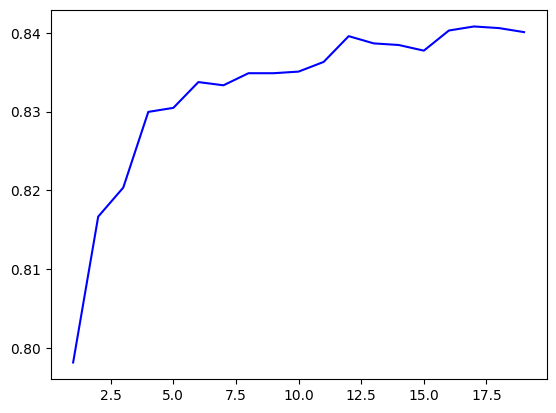

{1: 0.7981369638652882, 2: 0.8166649605896202, 3: 0.8203500870099294, 4: 0.8299723615518477, 5: 0.8304841846657796, 6: 0.8337598525949432, 7: 0.8333503941037977, 8: 0.8348858634455932, 9: 0.8348858634455932, 10: 0.8350905926911659, 11: 0.8363189681646023, 12: 0.839594636093766, 13: 0.8386733544886887, 14: 0.8384686252431159, 15: 0.8377520728836114, 16: 0.8403111884532706, 17: 0.8408230115672024, 18: 0.8406182823216296, 19: 0.8401064592076978}


In [64]:
plt.plot(res.keys(), res.values(), '-b')
plt.show()
print(res)

In [67]:
print(f"the best number of neighbors for this dataset is 17 and it's accuracy is {res[17]}")

the best number of neighbors for this dataset is 17 and it's accuracy is 0.8408230115672024
